In [25]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
IDIR = '../features/'

# Directly loading features to train XGB

In [4]:
df_train = pd.read_csv(IDIR + 'df_train.csv')
labels = pd.read_csv(IDIR + 'labels.csv')
f_to_use = ['user_total_orders', 'user_total_items', 'total_distinct_items', \
            'user_average_days_between_orders', 'user_average_basket', \
            'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio', \
            'aisle_id', 'department_id', 'product_orders', 'product_reorders', \
            'product_reorder_rate', 'UP_orders', 'UP_orders_ratio', \
            'UP_average_pos_in_cart', 'UP_reorder_rate', 'UP_orders_since_last', \
            'UP_delta_hour_vs_last']
df_train = df_train[f_to_use]

In [19]:
print(df_train.shape, len(f_to_use))
df_train.head()

(8474661, 21) 19


,order_id,product_id,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,order_hour_of_day,days_since_prior_order,days_since_ratio,...,department_id,product_orders,product_reorders,product_reorder_rate,UP_orders,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last
0,1187899,17122,11,59,18,19.0,5.363636,8,14.0,0.736842,...,4,13880,9377.0,0.675576,1,0.090909,6.000000,0.090909,6,7
1,1187899,196,11,59,18,19.0,5.363636,8,14.0,0.736842,...,7,35791,27791.0,0.776480,10,0.909091,1.400000,0.909091,1,0
2,1187899,26405,11,59,18,19.0,5.363636,8,14.0,0.736842,...,17,1214,536.0,0.441516,2,0.181818,5.000000,0.181818,7,1
3,1187899,13032,11,59,18,19.0,5.363636,8,14.0,0.736842,...,14,3751,2465.0,0.657158,3,0.272727,6.333333,0.272727,1,0
4,1187899,39657,11,59,18,19.0,5.363636,8,14.0,0.736842,...,19,5019,3846.0,0.766288,1,0.090909,3.000000,0.090909,1,0


In [15]:
print(labels.shape)
print('0: ', np.sum(labels == 0), '\n1: ', np.sum(labels == 1))
labels.head()

(8474661, 1)
0:  0    7645837
dtype: int64 
1:  0    828824
dtype: int64


,0
0,0
1,1
2,1
3,1
4,1


# XGB Cross Validation

In [36]:
%%time

print('formating for xgb')
d_train = xgb.DMatrix(df_train[f_to_use], \
                      label = labels)

formating for xgb


In [ ]:
%%time

# eta = [0.1]
params = {
  "objective"           : "reg:logistic",
  "eval_metric"         : "logloss",
  "eta"                 : 0.5,
  "max_depth"           : 6,
  "min_child_weight"    : 10,
  "gamma"               : 0.70,
  "subsample"           : 0.76,
  "colsample_bytree"    : 0.95,
  "alpha"               : 2e-05,
  "lambda"              : 10
}
ROUNDS = 100

xgb_cv = xgb.cv(params, \
                d_train, \
                ROUNDS, \
                nfold = 3, \
                stratified = True, \
                metrics = 'logloss', \
                early_stopping_rounds = 10, \
                verbose_eval = 10)

xgb_cv.tail()

[0]	train-logloss:0.424365+9.35391e-05	test-logloss:0.424383+4.04173e-05
[1]	train-logloss:0.329645+7.88346e-05	test-logloss:0.329712+0.000116523
[2]	train-logloss:0.287403+0.000843598	test-logloss:0.287495+0.000645268
[3]	train-logloss:0.266767+0.000293526	test-logloss:0.2669+0.000135451
[4]	train-logloss:0.2569+0.000169313	test-logloss:0.257052+0.00014678
[5]	train-logloss:0.252161+0.000135546	test-logloss:0.252324+0.000230175
[6]	train-logloss:0.249958+0.000124064	test-logloss:0.250151+0.000246417
[7]	train-logloss:0.248901+9.10433e-05	test-logloss:0.24912+0.000212817
[8]	train-logloss:0.248278+0.000127216	test-logloss:0.248528+0.000220143
[9]	train-logloss:0.247827+0.000123777	test-logloss:0.248106+0.000220896
[10]	train-logloss:0.247582+0.00015292	test-logloss:0.247895+0.000215603
[11]	train-logloss:0.247347+0.000115728	test-logloss:0.247694+0.000244936
[12]	train-logloss:0.247124+0.000147989	test-logloss:0.247492+0.00023187
[13]	train-logloss:0.246926+0.000167016	test-logloss:0.2

In [35]:
xgb_cv.tail()

,test-logloss-mean,test-logloss-std,train-logloss-mean,train-logloss-std
95,0.246401,0.000139,0.245888,0.000107
96,0.246385,0.000141,0.245869,0.000106
97,0.246371,0.000139,0.245849,0.000107
98,0.246353,0.000141,0.245825,0.000106
99,0.246337,0.000144,0.245804,0.000103


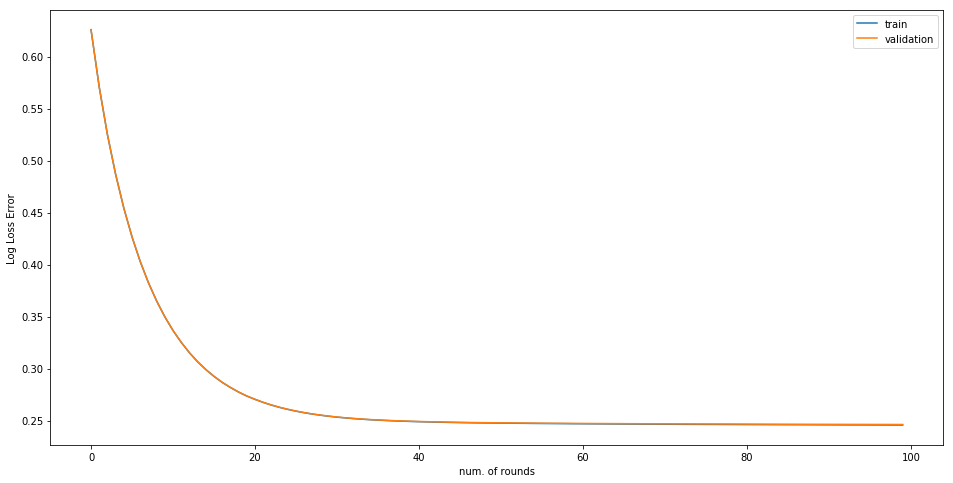

In [39]:
plt.figure(figsize=(16,8))
plt.plot(xgb_cv['train-logloss-mean'], label='train')
plt.plot(xgb_cv['test-logloss-mean'], label='validation')
# plt.xlim(200, 400)
# plt.ylim(0.3, 0.38)
plt.xlabel('num. of rounds')
plt.ylabel('Log Loss Error')
plt.legend()
plt.show()

# XGB Train

In [58]:
print(df_train.shape, labels.shape)
labels['0'].head()

(8474661, 19) (8474661, 1)


0    0
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [62]:
print('XGB train...')
skf = StratifiedKFold(n_splits = 10, random_state=None, shuffle=False)
fold_count = 0
for train_index, val_index in skf.split(df_train, labels['0']):
    X_train, X_val = df_train.iloc[train_index, :], df_train.iloc[val_index, :]
    y_train, y_val = labels.iloc[train_index, :], labels.iloc[val_index, :]

    print('formating for xgb')
    d_train = xgb.DMatrix(X_train, label = y_train)
    d_valid = xgb.DMatrix(X_val, label = y_val)
    watchlist = [(d_train, 'train'), (d_valid, 'val')]

    print('Training...')
    bst = xgb.train(params = params, \
                    dtrain = d_train, \
                    num_boost_round = ROUNDS, \
                    evals = watchlist, \
                    verbose_eval = 10, \
                    early_stopping_rounds = 10)
    d_test = xgb.DMatrix(X_val)
    pred_val = pd.DataFrame(bst.prredict(d_test))
    pred_val.to_csv('./xgb_train_fold_{}.csv'.format(fold_count))
    pd.DataFrame(y_val).to_csv('./y_val_fold){}.csv'.format(fold_count))
    fold_count += 1
    break

XGB train...
formating for xgb
Training...
[0]	train-logloss:0.424387	val-logloss:0.424496
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 10 rounds.
[10]	train-logloss:0.247803	val-logloss:0.248158
[20]	train-logloss:0.246245	val-logloss:0.247076


TypeError: '>=' not supported between instances of 'int' and 'str'

# Feature Engineering

In [3]:
print('loading prior')
priors = pd.read_csv(IDIR + 'order_products__prior.csv', dtype={
            'order_id': np.int32,
            'product_id': np.uint16,
            'add_to_cart_order': np.int16,
            'reordered': np.int8})

print('loading train')
train = pd.read_csv(IDIR + 'order_products__train.csv', dtype={
            'order_id': np.int32,
            'product_id': np.uint16,
            'add_to_cart_order': np.int16,
            'reordered': np.int8})

print('loading orders')
orders = pd.read_csv(IDIR + 'orders.csv', dtype={
        'order_id': np.int32,
        'user_id': np.int32,
        'eval_set': 'category',
        'order_number': np.int16,
        'order_dow': np.int8,
        'order_hour_of_day': np.int8,
        'days_since_prior_order': np.float32})

print('loading products')
products = pd.read_csv(IDIR + 'products.csv', dtype={
        'product_id': np.uint16,
        'order_id': np.int32,
        'aisle_id': np.uint8,
        'department_id': np.uint8},
        usecols=['product_id', 'aisle_id', 'department_id'])

print('priors {}: {}'.format(priors.shape, ', '.join(priors.columns)))
print('orders {}: {}'.format(orders.shape, ', '.join(orders.columns)))
print('train {}: {}'.format(train.shape, ', '.join(train.columns)))

loading prior
loading train
loading orders
loading products
priors (32434489, 4): order_id, product_id, add_to_cart_order, reordered
orders (3421083, 7): order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order
train (1384617, 4): order_id, product_id, add_to_cart_order, reordered


In [19]:
print('computing product f')
prods = pd.DataFrame()
prods['orders'] = priors.groupby(priors.product_id).size().astype(np.int32)
prods['reorders'] = priors['reordered'].groupby(priors.product_id).sum().astype(np.float32)
prods['reorder_rate'] = (prods.reorders / prods.orders).astype(np.float32)
products = products.join(prods, on='product_id')
products.set_index('product_id', drop=False, inplace=True)
del prods

computing product f


In [26]:
print('add order info to priors')
orders.set_index('order_id', inplace=True, drop=False)
priors = priors.join(orders, on='order_id', rsuffix='_')
priors.drop('order_id_', inplace=True, axis=1)
priors.head()

,order_id,product_id,add_to_cart_order,reordered,order_id_,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,2,202279,prior,3,5,9,8.0
1,2,28985,2,1,2,202279,prior,3,5,9,8.0
2,2,9327,3,0,2,202279,prior,3,5,9,8.0
3,2,45918,4,1,2,202279,prior,3,5,9,8.0
4,2,30035,5,0,2,202279,prior,3,5,9,8.0


In [50]:
orders.groupby('user_id').size().head(10), orders.groupby('user_id').size().tail(10)

(user_id
 1     11
 2     15
 3     13
 4      6
 5      5
 6      4
 7     21
 8      4
 9      4
 10     6
 dtype: int64, user_id
 206200    24
 206201    33
 206202    23
 206203     6
 206204     5
 206205     4
 206206    68
 206207    17
 206208    50
 206209    14
 dtype: int64)

In [49]:
priors.groupby('user_id').size().head(10), priors.groupby('user_id').size().tail(10)

(user_id
 1      59
 2     195
 3      88
 4      18
 5      37
 6      14
 7     206
 8      49
 9      76
 10    143
 dtype: int64, user_id
 206200    279
 206201    404
 206202    198
 206203    119
 206204     54
 206205     32
 206206    285
 206207    223
 206208    677
 206209    129
 dtype: int64)

In [58]:
### user features

print('computing user f')
users = pd.DataFrame()
users['average_days_between_orders'] = orders.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)
users['nb_orders'] = orders.groupby('user_id').size().astype(np.int16) # orders data gives user_id, order_id
users['total_items'] = priors.groupby('user_id').size().astype(np.int16) # priors data gives order_id, product_id
users['all_products'] = priors.groupby('user_id')['product_id'].apply(set)
users['num_distinct_items'] = (users.all_products.map(len)).astype(np.int16)
users['average_basket'] = (users.total_items / users.nb_orders).astype(np.float32)
print('user f', users.shape)

computing user f
user f (206209, 6)


In [68]:
### userXproduct features

print('compute userXproduct f - this is long...')
priors['user_product'] = priors.product_id + priors.user_id * 100000

compute userXproduct f - this is long...


In [70]:
# For each (user_id , product_id) pair, 
## count number of occurences of this pair
## latest, max(order_number, order_id)
## accumulated add_to_cart_order

d = dict()
for row in priors.itertuples():
    z = row.user_product
    if z not in d:
        d[z] = (1, \
                (row.order_number, row.order_id), \
                row.add_to_cart_order)
    else:
        d[z] = (d[z][0] + 1, \
                max(d[z][1], (row.order_number, row.order_id)), \
                d[z][2] + row.add_to_cart_order)

print('to dataframe (less memory)')
userXproduct = pd.DataFrame.from_dict(d, orient='index')

In [77]:
print('to dataframe (less memory)')
userXproduct = pd.DataFrame.from_dict(d, orient='index')
del d
userXproduct.columns = ['nb_orders', 'last_order_id', 'sum_pos_in_cart']
userXproduct.nb_orders = userXproduct.nb_orders.astype(np.int16)
userXproduct.last_order_id = userXproduct.last_order_id.map(lambda x: x[1]).astype(np.int32)
userXproduct.sum_pos_in_cart = userXproduct.sum_pos_in_cart.astype(np.int16)
print('user X product f', len(userXproduct))
userXproduct.head()

to dataframe (less memory)
user X product f 13293564


,nb_orders,last_order_id,sum_pos_in_cart
-1246903360,5,104690,10
-1246907495,5,132412,16
-1246927153,1,2,3
-1246890562,5,2382766,24
-1246906445,3,2382766,14


In [119]:
### train / test orders ###
print('split orders : train, test')
test_orders = orders[orders.eval_set == 'test']
train_orders = orders[orders.eval_set == 'train']
prior_orders = orders[orders.eval_set == 'prior']

train.set_index(['order_id', 'product_id'], inplace=True, drop=False)
priors.set_index(['order_id', 'product_id'], inplace=True, drop=False)

split orders : train, test


In [126]:
### Build list of candidate products to reorder, with features ###

def features(selected_orders, labels_given=False):
    print('build candidate list')
    order_list = []
    product_list = []
    labels = []
    i=0
    for row in selected_orders.itertuples():
        i+=1
        if i%10000 == 0: print('order row',i)
        order_id = row.order_id
        user_id = row.user_id
        user_products = users.all_products[user_id]
        product_list += user_products
        order_list += [order_id] * len(user_products)
        if labels_given:
            labels += [(order_id, product) in train.index for product in user_products]
        
    df = pd.DataFrame({'order_id':order_list, 'product_id':product_list}, dtype=np.int32)
    labels = np.array(labels, dtype=np.int8)
    del order_list
    del product_list
    
    print('user related features')
    df['user_id'] = df.order_id.map(orders.user_id)
    df['user_total_orders'] = df.user_id.map(users.nb_orders)
    df['user_total_items'] = df.user_id.map(users.total_items)
    df['total_distinct_items'] = df.user_id.map(users.total_distinct_items)
    df['user_average_days_between_orders'] = df.user_id.map(users.average_days_between_orders)
    df['user_average_basket'] =  df.user_id.map(users.average_basket)
    
    print('order related features')
    # df['dow'] = df.order_id.map(orders.order_dow)
    df['order_hour_of_day'] = df.order_id.map(orders.order_hour_of_day)
    df['days_since_prior_order'] = df.order_id.map(orders.days_since_prior_order)
    df['days_since_ratio'] = df.days_since_prior_order / df.user_average_days_between_orders
    
    print('product related features')
    df['aisle_id'] = df.product_id.map(products.aisle_id)
    df['department_id'] = df.product_id.map(products.department_id)
    df['product_orders'] = df.product_id.map(products.orders).astype(np.int32)
    df['product_reorders'] = df.product_id.map(products.reorders)
    df['product_reorder_rate'] = df.product_id.map(products.reorder_rate)

    print('user_X_product related features')
    df['z'] = df.user_id * 100000 + df.product_id
    df.drop(['user_id'], axis=1, inplace=True)
    df['UP_orders'] = df.z.map(userXproduct.nb_orders)
    df['UP_orders_ratio'] = (df.UP_orders / df.user_total_orders).astype(np.float32)
    df['UP_last_order_id'] = df.z.map(userXproduct.last_order_id)
    df['UP_average_pos_in_cart'] = (df.z.map(userXproduct.sum_pos_in_cart) / df.UP_orders).astype(np.float32)
    df['UP_reorder_rate'] = (df.UP_orders / df.user_total_orders).astype(np.float32)
    df['UP_orders_since_last'] = df.user_total_orders - df.UP_last_order_id.map(orders.order_number)
    df['UP_delta_hour_vs_last'] = abs(df.order_hour_of_day - df.UP_last_order_id.map(orders.order_hour_of_day)).map(lambda x: min(x, 24-x)).astype(np.int8)
    #df['UP_same_dow_as_last_order'] = df.UP_last_order_id.map(orders.order_dow) == \
    #                                              df.order_id.map(orders.order_dow)

    df.drop(['UP_last_order_id', 'z'], axis=1, inplace=True)
    print(df.dtypes)
    print(df.memory_usage())
    return (df, labels)

In [127]:
%%time

df_train, labels = features(train_orders, labels_given=True)
f_to_use = ['user_total_orders', 'user_total_items', 'total_distinct_items', \
            'user_average_days_between_orders', 'user_average_basket', \
            'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio', \
            'aisle_id', 'department_id', 'product_orders', 'product_reorders', \
            'product_reorder_rate', 'UP_orders', 'UP_orders_ratio', \
            'UP_average_pos_in_cart', 'UP_reorder_rate', 'UP_orders_since_last', \
            'UP_delta_hour_vs_last']
len(f_to_use)

build candidate list


KeyboardInterrupt: 

In [ ]:
df_train.head()

In [ ]:
labels.head()